In [1]:
!pip install mlxtend

    100% |████████████████████████████████| 1.3MB 703kB/s eta 0:00:01
Requirement not upgraded as not directly required: numpy>=1.10.4 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from mlxtend)
Requirement not upgraded as not directly required: scipy>=0.17 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from mlxtend)
Requirement not upgraded as not directly required: scikit-learn>=0.18 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from mlxtend)
Requirement not upgraded as not directly required: matplotlib>=1.5.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from mlxtend)
Requirement not upgraded as not directly required: pandas>=0.17.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from mlxtend)
Requirement not upgraded as not directly required: setuptools in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from mlxtend)
Requirement not upgraded as not directly required: six>=1.10 in /opt/conda/envs/DSX-P

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# The code was removed by DSX for sharing.

,Unnamed: 0,SKU,SKU_Desc,QTY,Unit Price,Weight,Subtotal,lag,Cust,Single unit price,...,RRP (includes GST if applicable),Single unit price_num,Unit price for box buy_num,RRP (includes GST if applicable)_num,Subtotal_num,new_weight,qty_real,unit_price_calc,Subtotal_WS,Subtotal_RRP
0,27,SPHONRA2.1,Organic Raw Honey - Australian 1KG,1,16.45,1.4 kg,16.45,Product code,Stas Svamin,$16.45,...,$19.95,16.45,13.3,19.95,16.45,1.0,1.0,16.45,16.45,19.95
1,28,SPHONRA2.1,Organic Raw Honey - Australian 1KG,1,16.45,1.4 kg,16.45,HISNM5.500,Amanda Bernstein,$16.45,...,$19.95,16.45,13.3,19.95,16.45,1.0,1.0,16.45,16.45,19.95
2,29,SPHONRA2.1,Organic Raw Honey - Australian 1KG,1,16.45,1.4 kg,16.45,GRCORTS2.150,Diana Stapleton,$16.45,...,$19.95,16.45,13.3,19.95,16.45,1.0,1.0,16.45,16.45,19.95
3,30,GRMILH2.5,Organic Millet Hulled 5KG FILLED SPLIT,1.0 kg,$4.86/kg,5.08 kg,4.86,SPHONRA2.1,Stas Svamin,$24.30,...,$31.60,24.30,24.3,31.60,4.86,5.0,0.2,24.30,4.86,6.32
4,31,GRMILH2.5,Organic Millet Hulled 5KG FILLED SPLIT,3.0 kg,$4.86/kg,5.08 kg,14.58,BECHI2.400,Alina Malina,$24.30,...,$31.60,24.30,24.3,31.60,14.58,5.0,0.6,24.30,14.58,18.96


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 21 columns):
Unnamed: 0                              314 non-null int64
SKU                                     314 non-null object
SKU_Desc                                314 non-null object
QTY                                     314 non-null object
Unit Price                              314 non-null object
Weight                                  314 non-null object
Subtotal                                314 non-null float64
lag                                     314 non-null object
Cust                                    314 non-null object
Single unit price                       314 non-null object
Unit price for box buy                  314 non-null object
RRP (includes GST if applicable)        314 non-null object
Single unit price_num                   314 non-null float64
Unit price for box buy_num              314 non-null float64
RRP (includes GST if applicable)_num    314 non-null 

In [5]:
basket = (df_raw.groupby(['Cust', 'SKU'])['qty_real']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Cust'))

In [6]:
basket.head(10)

SKU,BACALTOO5.75,BACHITG5.50,BEADZ2.400,BEBLAL2.400,BEBLAT2.400,BECHA2.500,BECHI2.400,BEFOUBM2.400,BEFRE2.1.5,BEMUN2.5,...,TEPEP2.6,TEWHI2.6,TOCHE2.400,TODIC2.400,TOPAS2.210,TOPASR2.680,TOPURB2.690,TOPURS2.690,VDAPPCV2.500,VDTAMH2G2.250
Cust,,,,,,,,,,,,,,,,,,,,,
Alena Sannikova,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alina Malina,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Amanda Bernstein,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Amy Flanagan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amy Hallihan,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anastasia S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Charlotte Plaisant,0.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Diana Stapleton,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Elena Pillai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1  

In [8]:
basket_sets = basket.applymap(encode_units).fillna(0)

In [9]:
basket_sets.head()

SKU,BACALTOO5.75,BACHITG5.50,BEADZ2.400,BEBLAL2.400,BEBLAT2.400,BECHA2.500,BECHI2.400,BEFOUBM2.400,BEFRE2.1.5,BEMUN2.5,...,TEPEP2.6,TEWHI2.6,TOCHE2.400,TODIC2.400,TOPAS2.210,TOPASR2.680,TOPURB2.690,TOPURS2.690,VDAPPCV2.500,VDTAMH2G2.250
Cust,,,,,,,,,,,,,,,,,,,,,
Alena Sannikova,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
Alina Malina,0,0,0,0,0,0,1,0,0,0.0,...,0,0,0,0,0,0,0,0,0,1
Amanda Bernstein,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,1
Amy Flanagan,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
Amy Hallihan,0,0,0,0,1,1,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Build up the frequent items
#frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets = apriori(basket_sets, min_support=0.06, use_colnames=True)

In [11]:
frequent_itemsets.sort_values(by='support', ascending=False).head()

,support,itemsets
7,0.35,[DRPRUC2.250]
5,0.30,[CNCRE2.400]
20,0.30,[SVRSSS2.4]
3,0.25,[BECHI2.400]
6,0.25,[CNMIL2.400]


In [12]:
# Create the rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(CNCRE2.400, DRPRUC2.250)",(VDTAMH2G2.250),0.15,0.20,0.10,0.666667,3.333333,0.0700,2.400000
1,"(CNCRE2.400, VDTAMH2G2.250)",(DRPRUC2.250),0.10,0.35,0.10,1.000000,2.857143,0.0650,inf
2,"(DRPRUC2.250, VDTAMH2G2.250)",(CNCRE2.400),0.15,0.30,0.10,0.666667,2.222222,0.0550,2.100000
3,(CNCRE2.400),"(DRPRUC2.250, VDTAMH2G2.250)",0.30,0.15,0.10,0.333333,2.222222,0.0550,1.275000
4,(DRPRUC2.250),"(CNCRE2.400, VDTAMH2G2.250)",0.35,0.10,0.10,0.285714,2.857143,0.0650,1.260000
5,(VDTAMH2G2.250),"(CNCRE2.400, DRPRUC2.250)",0.20,0.15,0.10,0.500000,3.333333,0.0700,1.700000
6,(DRPRUC2.250),(VDTAMH2G2.250),0.35,0.20,0.15,0.428571,2.142857,0.0800,1.400000
7,(VDTAMH2G2.250),(DRPRUC2.250),0.20,0.35,0.15,0.750000,2.142857,0.0800,2.600000
8,(NUALMBS5.350),(HEHIMS5.600),0.10,0.15,0.10,1.000000,6.666667,0.0850,inf
9,(HEHIMS5.600),(NUALMBS5.350),0.15,0.10,0.10,0.666667,6.666667,0.0850,2.700000


In [13]:
support=rules.as_matrix(columns=['support'])

In [14]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.6) ].head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(NUALMBS5.350),(HEHIMS5.600),0.10,0.15,0.1,1.000000,6.666667,0.085,inf
9,(HEHIMS5.600),(NUALMBS5.350),0.15,0.10,0.1,0.666667,6.666667,0.085,2.700000
18,"(CNCRE2.400, BECHI2.400)",(NPFUSTS2.2),0.15,0.10,0.1,0.666667,6.666667,0.085,2.700000
23,(NPFUSTS2.2),"(CNCRE2.400, BECHI2.400)",0.10,0.15,0.1,1.000000,6.666667,0.085,inf
32,"(DRPRUC2.250, CNMIL2.400)","(BECHI2.400, VDTAMH2G2.250)",0.10,0.15,0.1,1.000000,6.666667,0.085,inf


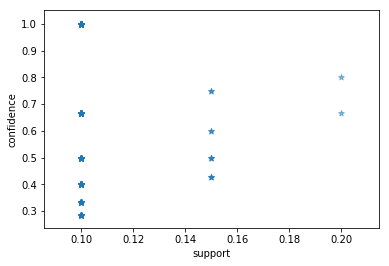

In [15]:
plt.scatter(rules['support'], rules['confidence'],   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [16]:
import seaborn as sns

In [17]:
#sns.heatmap(df_corr, cmap="Blues")

In [18]:
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [19]:
display(rules)

In [20]:
import brunel

In [21]:
nodes = pd.read_csv("https://github.com/Brunel-Visualization/Brunel/raw/master/python/examples/data/sample_nodes.csv")
edges = pd.read_csv("https://github.com/Brunel-Visualization/Brunel/raw/master/python/examples/data/sample_edges.csv")

In [22]:
edges

,From,To
0,a,b
1,a,c
2,a,d
3,b,c
4,a,e
5,e,f


In [23]:
%%brunel data('edges') key(From,To) edge + 
         data('nodes') network color(Node) key(Node) legends(none) style('fill-opacity:1;size:20px') label(Node)

<IPython.core.display.Javascript object>

In [24]:
%%brunel data('edges') key(From,To) edge + 
         data('nodes') network key(Node)

<IPython.core.display.Javascript object>

In [25]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
antecedants           270 non-null object
consequents           270 non-null object
antecedent support    270 non-null float64
consequent support    270 non-null float64
support               270 non-null float64
confidence            270 non-null float64
lift                  270 non-null float64
leverage              270 non-null float64
conviction            270 non-null float64
dtypes: float64(7), object(2)
memory usage: 19.1+ KB


In [26]:
frequent_itemsets.head()

,support,itemsets
0,0.15,[BACHITG5.50]
1,0.10,[BEADZ2.400]
2,0.15,[BEBLAT2.400]
3,0.25,[BECHI2.400]
4,0.10,[BEFOUBM2.400]


In [27]:
r_b = rules[ (rules['lift'] >= 4) &
       (rules['confidence'] >= 0.8) ]

In [28]:
r_b_node = r_b.groupby(by = ['consequents'], as_index=False)['antecedants'].count().fillna(0)
#pd.DataFrame({'Node' :  r_b['consequents'].unique()})

In [29]:
r_b_node

,consequents,antecedants
0,(HEHIMS5.600),1
1,"(BECHI2.400, DRPRUC2.250, CNMIL2.400)",1
2,"(CNCRE2.400, CNMIL2.400, VDTAMH2G2.250)",1
3,"(CNCRE2.400, BECHI2.400, VDTAMH2G2.250)",1
4,"(CNCRE2.400, CNMIL2.400)",2
5,"(CNMIL2.400, BECHI2.400)",2
6,(TOPASR2.680),1
7,"(CNMIL2.400, BACHITG5.50)",1
8,(TOPURB2.690),1
9,(BACHITG5.50),2


In [30]:
%%brunel data('r_b') key(antecedants,consequents) edge + 
         data('r_b_node') network  color(consequents) key(consequents) legends(none) style('fill-opacity:1;size:20px') label(consequents) size(antecedants)

<IPython.core.display.Javascript object>